## 🛠 02. Neural network classification with TensorFlow Exercises



1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.







tensorflow playground example neural network Try this network out for yourself on the TensorFlow Playground website. Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.






### 2.2 Replicate the model picture in Tensorflow

In [1]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Build model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,input_shape=(12,1),activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

# Compile the model
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [2]:
model_0.build()

In [3]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12, 6)             12        
                                                                 
 dense_1 (Dense)             (None, 12, 6)             42        
                                                                 
 dense_2 (Dense)             (None, 12, 6)             42        
                                                                 
 dense_3 (Dense)             (None, 12, 6)             42        
                                                                 
 dense_4 (Dense)             (None, 12, 6)             42        
                                                                 
 dense_5 (Dense)             (None, 12, 1)             7         
                                                                 
Total params: 187
Trainable params: 187
Non-trainable pa

### 2.3 Create a classification dataset using Scikit-Learn's make_moons() function

In [4]:
import sklearn.datasets
X,y = sklearn.datasets.make_moons(n_samples=1000,shuffle=True, noise=None, random_state=None)

In [5]:
X.shape,y.shape

((1000, 2), (1000,))

In [6]:
from numpy.lib.shape_base import split
# Splitting test and train
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

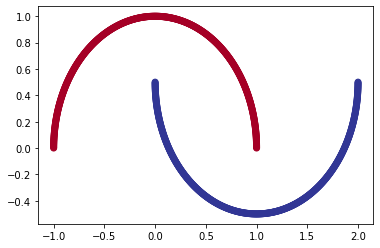

In [7]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

#### Model 0: Base model

In [8]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

# Compile the model
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_0 = model_0.fit(X_train,
                        y_train,
                        epochs=50,
                        verbose=0
                        )

In [9]:
# Evaluate the model
model_0.evaluate(X_test,y_test)

8/8 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 1.0000


[0.004938729107379913, 1.0]

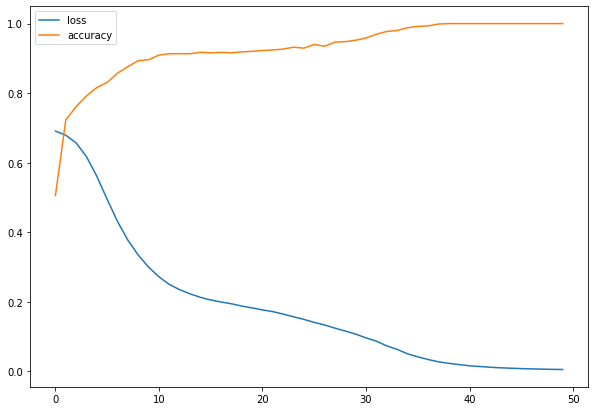

In [10]:
# Plot the loss curves
import pandas as pd
pd.DataFrame(history_0.history).plot(figsize=(10,7));

In [11]:
import numpy as np

def plot_decision_boundary(model,X,y):
  # Plots the decision boundary created by a model predicting X

  # Define the axis boundaries of the plot and create a meshgrid
  X_min,X_max = X[:,0].min()-0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min()-0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(X_min,X_max,100),
                       np.linspace(y_min,y_max,100))
  
  # Create X value (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0])>1:
    print('Doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
    print('Doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification


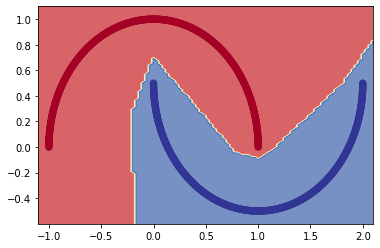

In [12]:
# Check out the predictions our model 
plot_decision_boundary(model=model_0,X=X,y=y)

### 2.4 MNIST Dataset

In [2]:
import tensorflow as tf 

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [16]:
# Checking the unique labels
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
# Cheking value counts 
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


In [19]:
# Normalize the data

train_images = train_images / 255.0

test_images = test_images / 255.0

#### Model 0: Base Model

In [21]:
# set random seed
tf.random.set_seed(42)

# Build model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28),name='input_layer'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer ='adam',
                metrics = ['accuracy'])

# Fit the model
history_0 = model_0.fit(train_images,
                        train_labels,
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4955 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3738 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3356 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3113 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2940 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2791 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2681 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2564 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2451 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0

In [22]:
# Evaluate the model
model_0.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 3ms/step - loss: 0.3447 - accuracy: 0.8814


[0.34466683864593506, 0.8813999891281128]

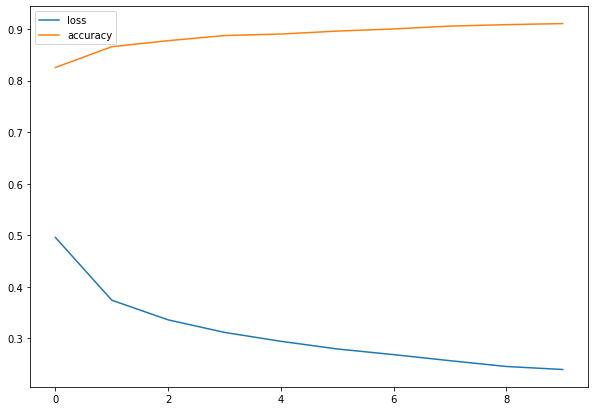

In [24]:
# Plot loss curves
import pandas as pd
pd.DataFrame(history_0.history).plot(figsize=(10,7))

#### Model 1: Increasing number of epochs

In [124]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# Compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_images,
                        train_labels,
                        epochs = 40)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4955 - accuracy: 0.8254
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3738 - accuracy: 0.8657
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3356 - accuracy: 0.8774
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3113 - accuracy: 0.8874
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.8903
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2791 - accuracy: 0.8960
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9002
Epoch 8/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2564 - accuracy: 0.9057
Epoch 9/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2451 - accuracy: 0.9085
Epoch 10/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

In [125]:
# Evaluating the model
model_1.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4453 - accuracy: 0.8933


[0.44530293345451355, 0.8932999968528748]

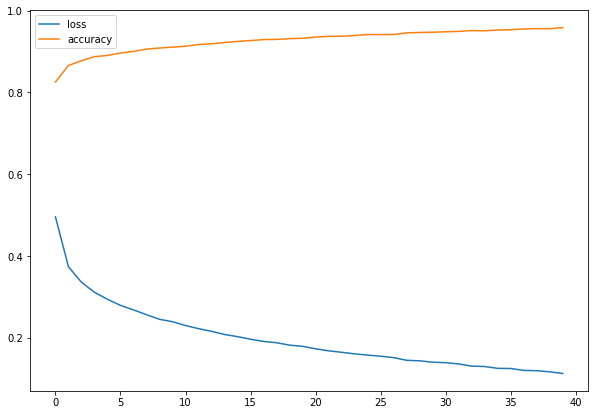

In [126]:
# Plot loss curves
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [127]:
# Making Predictions
pred_1 = model_1.predict(test_images).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [128]:
# Create a confusion matrix
import itertools

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(15,15),text_size=15):

  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix

  # Create the confusion matrix
  cm = confusion_matrix(y_true,tf.round(y_pred))
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig,ax = plt.subplots(figsize=figsize)
  # Create a matrix plot 
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax) 

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels
        )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[0])):
    plt.text(j,i,f'{cm[i,j]}({cm_norm[i,j]*100:.1f}%)',
            horizontalalignment = 'center',
            color = 'white' if cm[i,j]> threshold else 'black',
            size = 10)

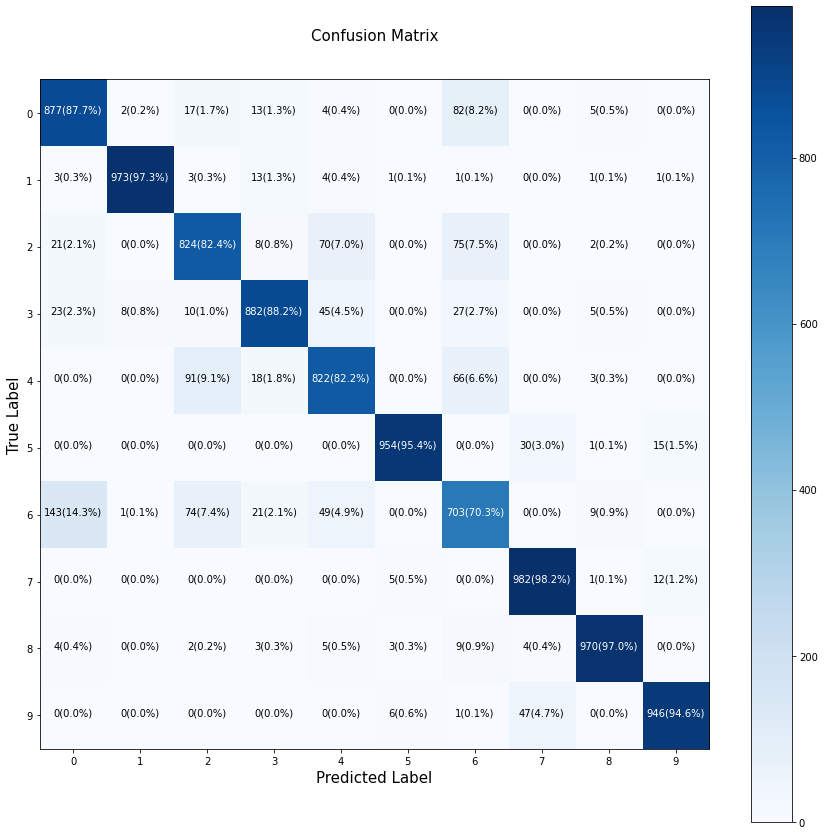

In [129]:
make_confusion_matrix(test_labels,pred_1)

### 2.5 Recreate TensorFlow's softmax activation function in your own code.

Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [130]:
def softmax_function(input_tensor):

  from math import exp

  denominator = 1

  for i,num in enumerate(input_tensor):
    denominator += exp(num)

  softmax_tensor = []
  
  for i,num in enumerate(input_tensor):
    softmax_tensor.append(exp(num)/denominator)

  return tf.constant(softmax_tensor)

In [131]:
import tensorflow as tf
input_tensor = tf.constant([1.3, 5.1, 2.2,0.7,1.1])
softmax_function(input_tensor)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.02007997, 0.8975986 , 0.04938877, 0.01102012, 0.01644009],
      dtype=float32)>

### 2.6 Create a function (or write code) to visualize multiple image predictions 

for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.

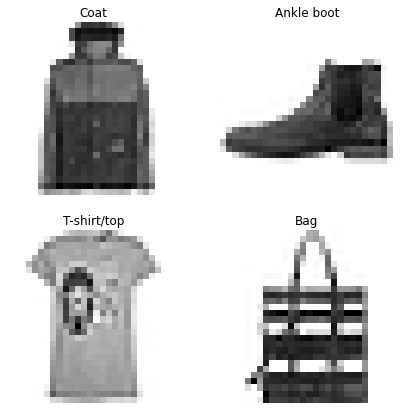

In [132]:
import random
import matplotlib.pyplot as plt

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(test_images)))
  plt.imshow(test_images[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[pred_1[rand_index]])
  plt.axis(False)

In [135]:
def plot_random_image(model,images,true_labels,classes):
  '''
  Picks a random image, plots it and labels it with a prediction and true label.
  '''

  # Set up random integer
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (predictino/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color)

1/1 [==============================] - 0s 16ms/step


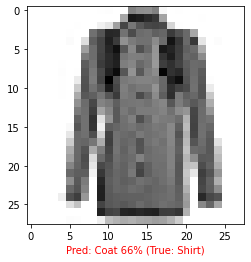

In [140]:
plot_random_image(model=model_1,
                  images=test_images,
                  true_labels=test_labels,
                  classes=class_names)

### 2.7 Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. 
For example, plot 3 images of the T-shirt class with their predictions.

In [141]:
def plot_random_image(model,images,true_labels,classes):
  '''
  Picks a random image, plots it and labels it with a prediction and true label.
  '''
  # Get specific class
  selected_class = 'Pullover'

  indices = [i for i, x in enumerate(true_labels) if x == 2] #index of pullover is 2


  # Set up random integer
  # i = random.randint(0,len(images))
  i = random.choice(indices)

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (predictino/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color)

1/1 [==============================] - 0s 16ms/step


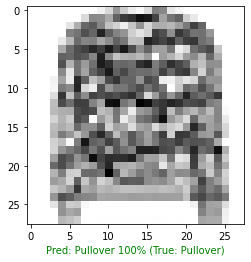

In [145]:
plot_random_image(model=model_1,
                  images=test_images,
                  true_labels=test_labels,
                  classes=class_names)

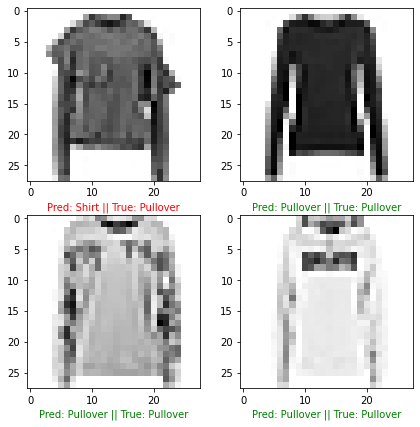

In [171]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))

indices = [i for i, x in enumerate(test_labels) if x == 2]

for i in range(4):
  ax = plt.subplot(2,2,i+1)

  rand_index = random.choice(indices)
  plt.imshow(test_images[rand_index],cmap=plt.cm.binary)
  # plt.title(class_names[pred_1[rand_index]])
  if class_names[pred_1[rand_index]] != class_names[test_labels[rand_index]]:
    color = 'red'
  else:
    color = 'green'

  plt.xlabel('Pred: {} || True: {}'.format(class_names[pred_1[rand_index]],
                                                    class_names[test_labels[rand_index]]),
                                                    color=color)
  # plt.axis(False)